In [302]:
# if you read this please end the torture and change the repo name to: two-truths-and-a-lie

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [303]:
df = pd.read_csv("data/sentimentdataset.csv")

## Data cleaning

In [304]:
unmapped = []

def sentiment_map(sentiment: str):
    sentiment = sentiment.strip()
    sentiment = sentiment.lower()

    if sentiment in ["positive", "happiness", "joy", "amusement", "enjoyment", "excitement", "elation", "euphoria", "gratitude", "hope", "empowerment", "enthusiasm", "fulfillment", "nostalgia", "ambivalence", "zest", "proud", "playful", "free-spirited", "inspired", "confident", "overjoyed", "joyfulreunion", "satisfaction", "blessed", "accomplishment", "optimism", "playfuljoy", "dreamchaser", "elegance", "creativity", "radiance", "rejuvenation", "festivejoy", "innerjourney", "freedom", "dazzle", "adrenaline", "artisticburst", "culinaryodyssey", "immersion", "spark", "positivity", "success", "grandeur", "emotion", "energy", "celebration", "charm", "ecstasy", "colorful", "hypnotic", "iconic", "journey", "engagement", "triumph", "breakthrough", "joy in baking", "vibrancy", "mesmerizing", "thrilling journey", "creative inspiration", "relief", "happy"]:
        return "Joy/Happiness"
    elif sentiment in ["negative", "sadness", "disappointed", "despair", "grief", "loneliness", "jealousy", "regret", "melancholy", "yearning", "devastated", "bittersweet", "heartbreak", "betrayal", "suffering", "emotionalstorm", "isolation", "disappointment", "lostlove", "exhaustion", "sorrow", "darkness", "desolation", "loss", "heartache", "solitude", "miscalculation", "solace", "embarrassed", "sad"]:
        return "Sadness"
    elif sentiment in ["neutral", "calmness", "contentment", "serenity", "boredom", "indifference", "numbness", "reflection", "mindfulness", "pensive", "harmony", "coziness", "melodic", "tranquility", "imagination", "culinary adventure", "winter magic", "nature's beauty", "celestial wonder", "runway creativity", "ocean's freedom", "whispers of the past"]:
        return "Neutral/Calm"
    elif sentiment in ["anger", "resentment", "frustration", "envy", "bitterness", "frustrated", "envious", "mischievous", "hate", "bad"]:
        return "Anger"
    elif sentiment in ["fear", "anxiety", "intimidation", "helplessness", "fearful", "apprehensive", "overwhelmed", "jealous", "desperation", "ruins", "pressure", "challenge"]:
        return "Fear"
    elif sentiment in ["disgust", "bitter", "shame", "dismissive", "contemplation"]:
        return "Disgust"
    elif sentiment in ["love", "admiration", "affection", "adoration", "kind", "pride", "compassion", "tenderness", "arousal", "grateful", "empathetic", "compassionate", "appreciation", "kindness", "friendship", "romance", "captivation", "connection", "touched", "heartwarming", "sympathy"]:
        return "Love/Affection"
    elif sentiment in ["awe", "anticipation", "reverence", "curiosity", "determination", "hopeful", "thrill", "motivation", "adventure", "exploration", "suspense", "renewed effort", "envisioning history"]:
        return "Anticipation"
    elif sentiment in ["surprise", "confusion", "wonderment", "enchantment", "intrigue", "whimsy", "wonder", "marvel", "amazement"]:
        return "Surprise"
    elif sentiment in ["acceptance", "inspiration", "confidence", "resilience", "obstacle"]:
        return "Trust"

    raise Exception(f"This is not mapped: {sentiment}")
    unmapped.append(sentiment)

    return 'no category'

In [305]:
# Filter data because before 2016 there is not enough data.
df = df[df['Year'] >= 2016]

In [306]:
def add_hashtags(row):
    text = row['Text']

    return text[text.find('#'):].strip() + " " + row['Hashtags'].strip()

In [307]:
df['Hashtags'] = df.apply(add_hashtags, axis=1)

In [308]:
def remove_hashtags(row):
    text = row['Text']

    return text[:text.find('#')].strip()

In [309]:
df['Text'] = df.apply(remove_hashtags, axis=1)

In [310]:
df['GeneralSentiment'] = df['Sentiment'].apply(sentiment_map)

In [311]:
joy = df[df['GeneralSentiment'] == 'Joy/Happiness']

joy.groupby(joy['Sentiment']).size().sort_values()

Sentiment
 Euphoria          1
 Journey           1
 Euphoria          1
 Positivity        1
 Positive          1
                  ..
 Gratitude         9
 Happy            13
 Excitement       32
 Joy              42
 Positive         44
Length: 86, dtype: int64

In [312]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Timestamp'].dt.day_name(), categories=day_order, ordered=True)


In [313]:
df['Country'] = df['Country'].apply(lambda s: s.strip())

In [314]:
df['Platform'] = df['Platform'].apply(lambda s: s.strip())

In [315]:
df['TextLength'] = df['Text'].apply(lambda s: len(s.strip()))

## Data analysis

In [316]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,GeneralSentiment,Weekday,TextLength
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Joy/Happiness,Sunday,37
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Sadness,Sunday,34
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Joy/Happiness,Sunday,35
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Joy/Happiness,Sunday,43
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral/Calm,Sunday,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,Joy/Happiness,Friday,109
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,Joy/Happiness,Friday,105
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,Joy/Happiness,Friday,98
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,Joy/Happiness,Saturday,103


### Number of posts per sentiment

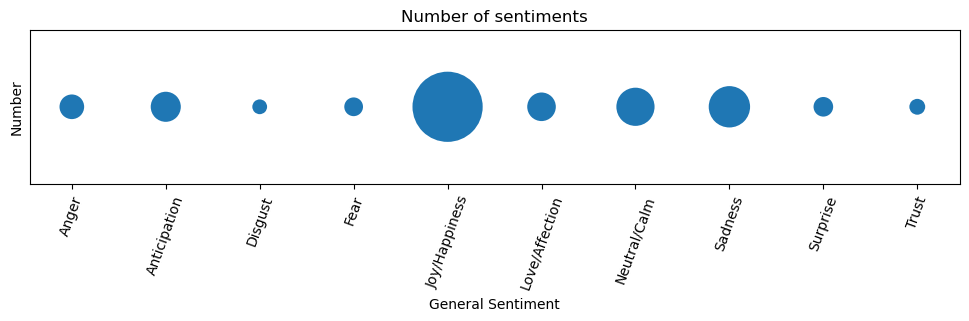

In [317]:
general_sentiment_counts = df.groupby(df['GeneralSentiment']).size()

sentiments = general_sentiment_counts.index
counts = general_sentiment_counts.values

plt.figure(figsize=(12, 2))
plt.scatter(sentiments, [1] * len(sentiments), s=counts * 10, edgecolors='w', linewidth=2)

plt.title('Number of sentiments')
plt.xlabel('General Sentiment')
plt.yticks([])
plt.ylabel('Number')
plt.xticks(rotation=70)

plt.show()

In [318]:
# for _, row in df[df['GeneralSentiment'] == 'Disgust'].iterrows():
#     print(row['Sentiment'], row['Text'])

### Number of posts per time for every sentiment

In [319]:
hourly_sentiment = df.groupby(df['Hour'])['GeneralSentiment'].value_counts().unstack().fillna(0)
weekday_sentiment = df.groupby(df['Weekday'])['GeneralSentiment'].value_counts().unstack().fillna(0)
monthly_sentiment = df.groupby(df['Month'])['GeneralSentiment'].value_counts().unstack().fillna(0)
yearly_sentiment = df.groupby(df['Year'])['GeneralSentiment'].value_counts().unstack().fillna(0)

/var/folders/l8/4c2yk26x4wb5hc7974w49mvc0000gq/T/ipykernel_1959/1819215823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sentiment = df.groupby(df['Weekday'])['GeneralSentiment'].value_counts().unstack().fillna(0)


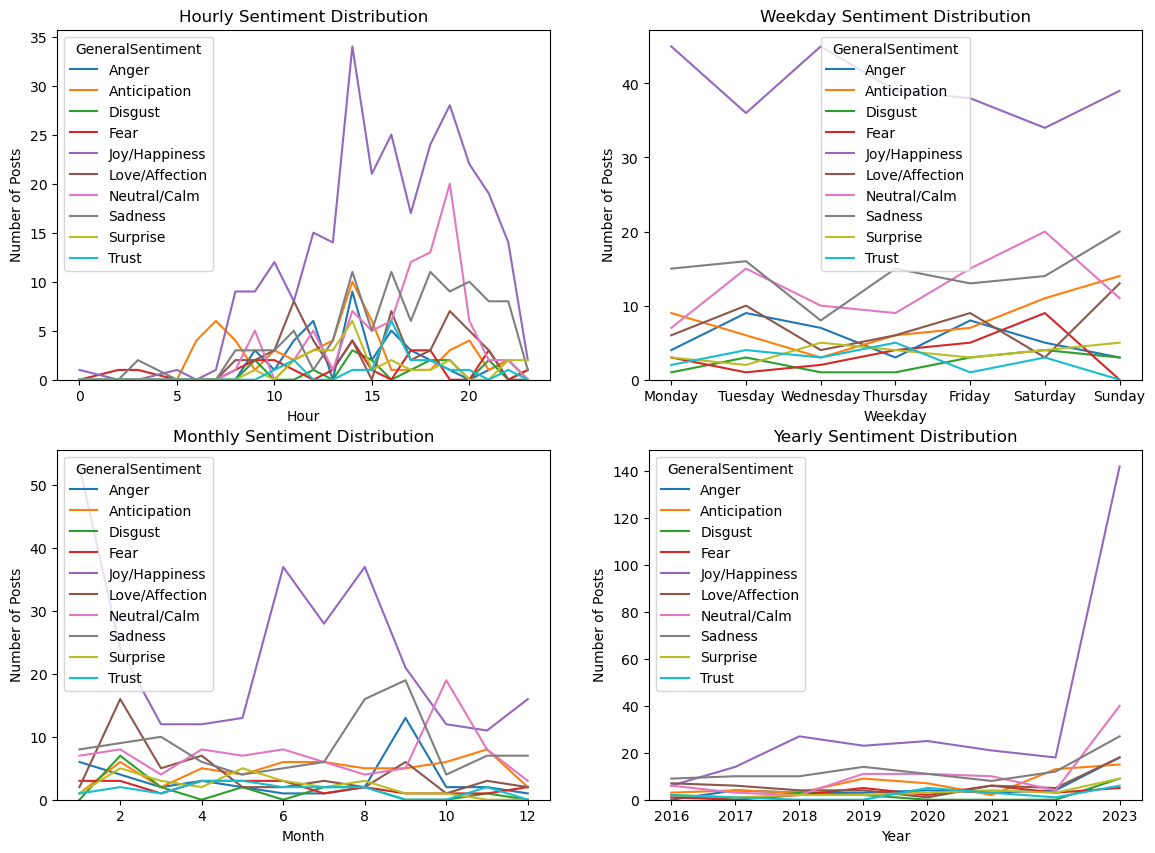

In [320]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

hourly_sentiment.plot(kind='line', ax=axs[0, 0])
axs[0, 0].set_title('Hourly Sentiment Distribution')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Number of Posts')
axs[0, 0].legend(title='GeneralSentiment')
axs[0, 0].set_ylim(bottom=0)

weekday_sentiment.plot(kind='line', ax=axs[0, 1])
axs[0, 1].set_title('Weekday Sentiment Distribution')
axs[0, 1].set_xlabel('Weekday')
axs[0, 1].set_ylabel('Number of Posts')
axs[0, 1].legend(title='GeneralSentiment')
axs[0, 1].set_ylim(bottom=0)

monthly_sentiment.plot(kind='line', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Sentiment Distribution')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Posts')
axs[1, 0].legend(title='GeneralSentiment')
axs[1, 0].set_ylim(bottom=0)

yearly_sentiment.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Yearly Sentiment Distribution')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Posts')
axs[1, 1].legend(title='GeneralSentiment')
axs[1, 1].set_ylim(bottom=0)

plt.show()

### Number of posts per time

In [321]:
hourly_posts = df.groupby(df['Hour']).size()
weekday_posts = df.groupby(df['Weekday']).size()
monthly_posts = df.groupby(df['Month']).size()
yearly_posts = df.groupby(df['Year']).size()

/var/folders/l8/4c2yk26x4wb5hc7974w49mvc0000gq/T/ipykernel_1959/2275757461.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_posts = df.groupby(df['Weekday']).size()


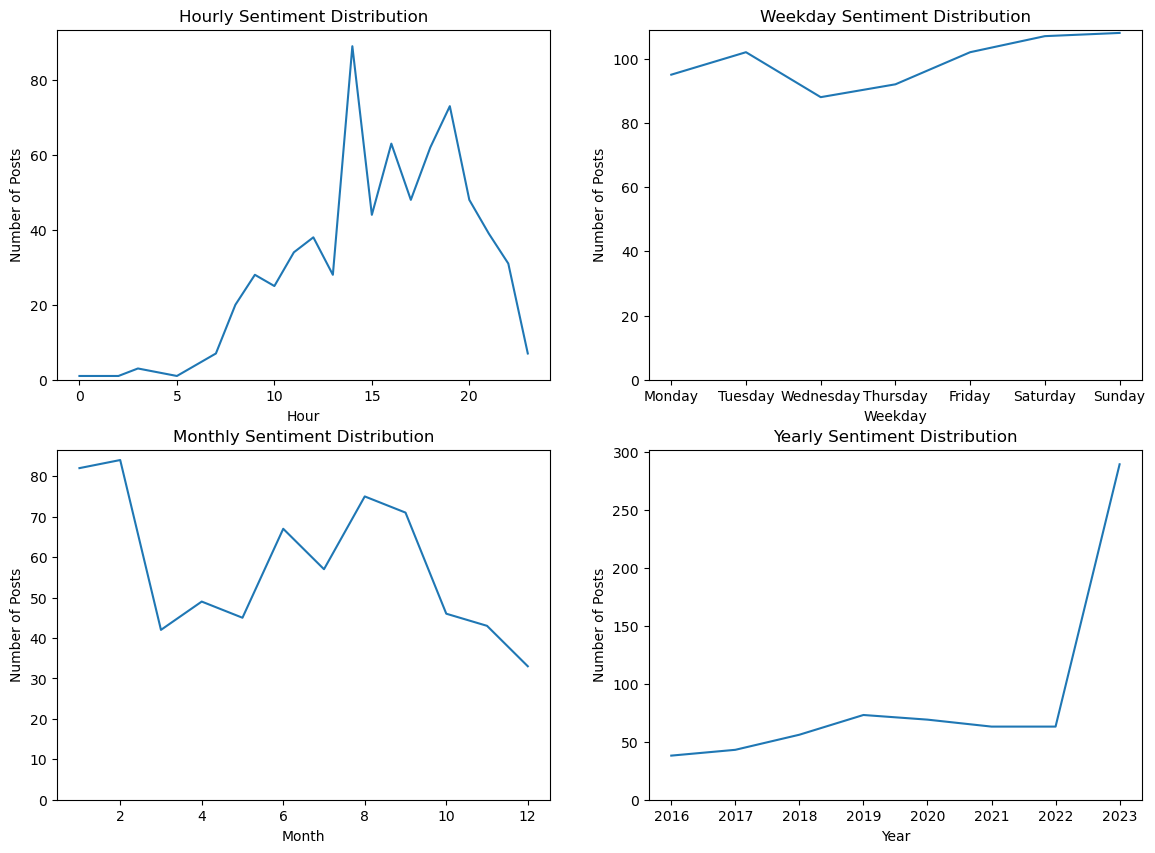

In [322]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

hourly_posts.plot(kind='line', ax=axs[0, 0])
axs[0, 0].set_title('Hourly Sentiment Distribution')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Number of Posts')
axs[0, 0].set_ylim(bottom=0)

weekday_posts.plot(kind='line', ax=axs[0, 1])
axs[0, 1].set_title('Weekday Sentiment Distribution')
axs[0, 1].set_xlabel('Weekday')
axs[0, 1].set_ylabel('Number of Posts')
axs[0, 1].set_ylim(bottom=0)

monthly_posts.plot(kind='line', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Sentiment Distribution')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Posts')
axs[1, 0].set_ylim(bottom=0)

yearly_posts.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Yearly Sentiment Distribution')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Posts')
axs[1, 1].set_ylim(bottom=0)

plt.show()

### Number of posts per country for every sentiment

In [323]:
country_sentiment = df.groupby(df['Country'])['GeneralSentiment'].value_counts().unstack().fillna(0)

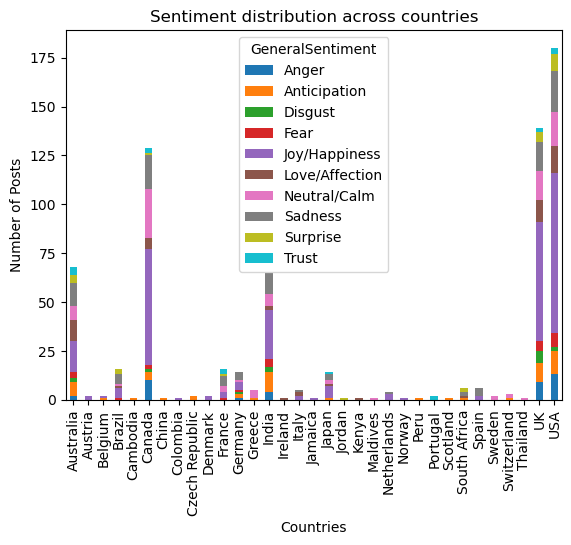

In [324]:
country_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment distribution across countries')
plt.xlabel('Countries')
plt.ylabel('Number of Posts')
plt.legend(title='GeneralSentiment')
plt.ylim(bottom=0)

plt.show()

### Sentiments per countries

In [325]:
country_posts = df.groupby(df['Sentiment']).size()

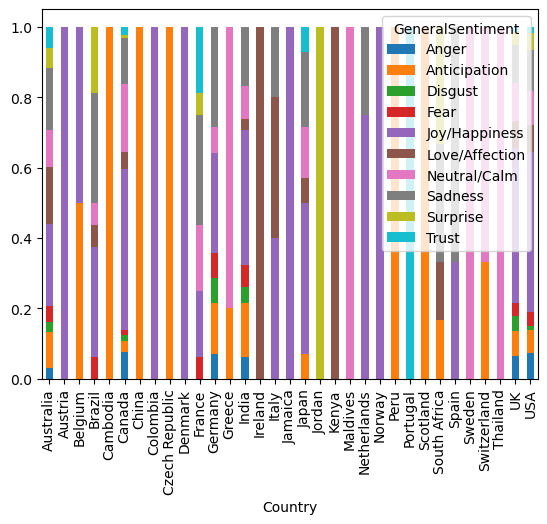

In [326]:
normalized_country_sentiment = country_sentiment.div(country_sentiment.sum(axis=1), axis=0)

normalized_country_sentiment.plot(kind='bar', stacked=True)

plt.show()

### Sentiments per platform

In [327]:
platform_sentiment = df.groupby(df['Platform'])['GeneralSentiment'].value_counts().unstack().fillna(0).T

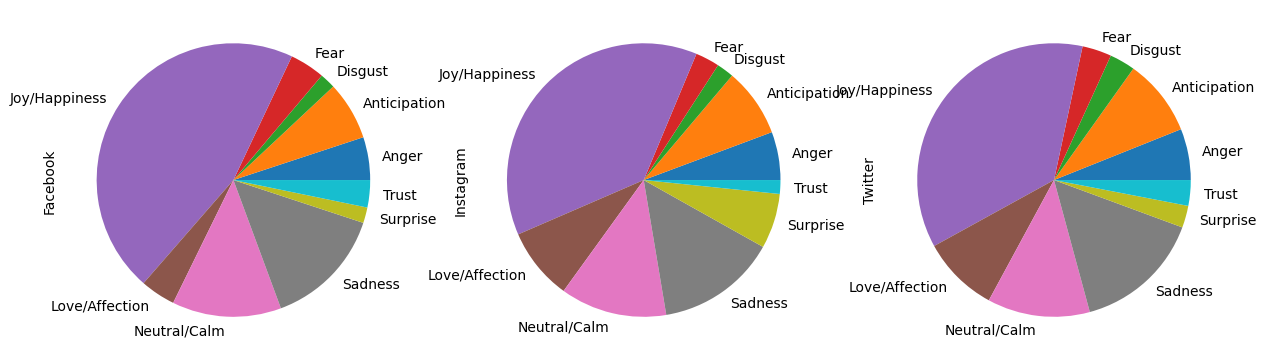

In [328]:
platform_sentiment.plot(kind='pie', subplots=True, legend=False, figsize=(15, 15))

plt.show()

### Average number of likes compared to the sentiments

In [329]:
average_like_number = df.groupby('GeneralSentiment')['Likes'].mean()

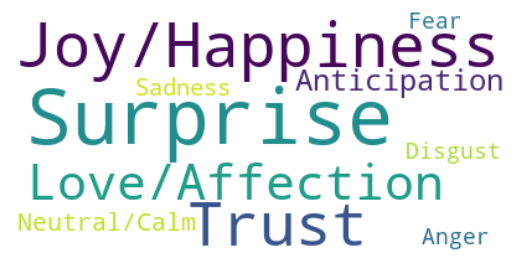

In [330]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_like_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

### Average number of retweets compared to the sentiments

In [331]:
average_retweet_number = df.groupby('GeneralSentiment')['Retweets'].mean()

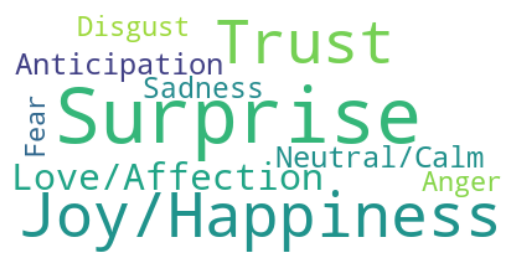

In [332]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_retweet_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

### Length of text compared to the sentiments

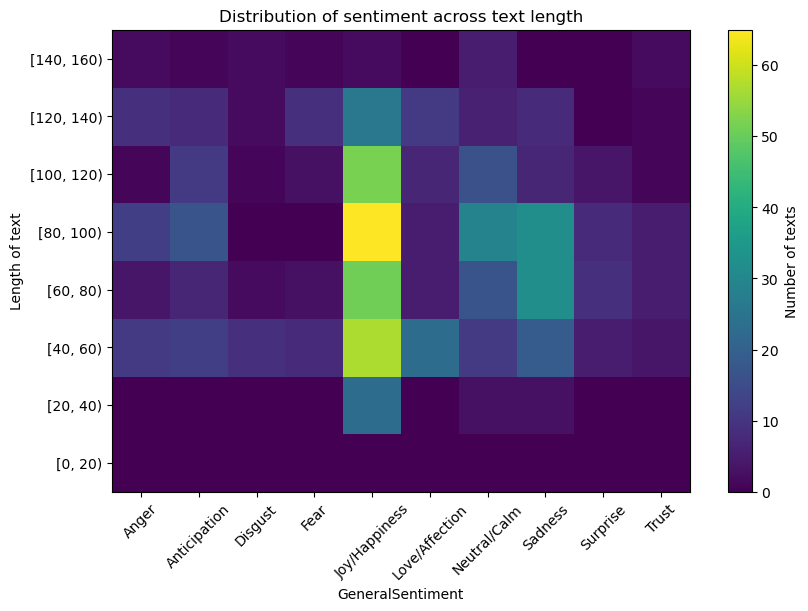

In [333]:
df['length_bin'] = pd.cut(df['TextLength'], bins=np.arange(0, df['TextLength'].max() + 20, 20), right=False, include_lowest=True)

pivot_table = df.pivot_table(index='length_bin', columns='GeneralSentiment', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))

plt.imshow(pivot_table)

plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=[str(interval) for interval in pivot_table.index])

plt.gca().invert_yaxis()
plt.colorbar(label='Number of texts')

plt.title('Distribution of sentiment across text length')
plt.xlabel('GeneralSentiment')
plt.ylabel('Length of text')

plt.show()